In [3]:
import numpy  as np
import matplotlib.pyplot as plt

In [4]:
def bracket_livro(x, y, flag=False, l_r=None, x1=None, x2=None):

    # Iniciar coordenadas caso não sejão específicadas 
    if x1==None:
        x1 = x[0]
    if x2==None:
        x2 = x[-1]

    # Iniciar o parâmetro condizente ao tamanho do passo
    if l_r == None:
        l_r = 0.0001

    if y(x1) > y(x2):
        x1 = x2

    # Variável auxiliar 
    xx2 = x2
    while True:
        # Executando os passos
        xx2 = xx2 - (abs(xx2*l_r) + 0.00001)

        ''' Se o passo atual resulta em uma função 
        maior que a anterior a otimização é encerrada'''
        if y(x2) <= y(xx2):
            if flag:
                x2 = xx2

            # Case para retornar a sequencia menor para maior
            if x1 > x2:
         
                return x2, x1

            return x1, x2
        
        x2 = xx2

In [5]:
'''Modificação do algoritmo bracket apresentado no livro, nesse
tentamos melhor o intervalo em ambos os lados, coisa que não ocorre
no do livro'''
def bracket_mod1(x, y):

    xx1, xx2 = bracket_livro(x, y)
    return bracket_livro(x, y, True, x1=xx1, x2=xx2)

In [6]:
def x_squared(x):
    return x**2

def x_squared1(x):
    return (x+6)**2

x = np.linspace(-15, 5, 10000)

In [7]:
bracket = bracket_livro(x, x_squared1)
bracket_mod = bracket_mod1(x, x_squared1)
print("Bracket: ", bracket)
print("Bracket_mod: ", bracket_mod)

Bracket:  (-15.0, -5.9999485154583265)
Bracket_mod:  (-6.000558510309872, -5.9999485154583265)


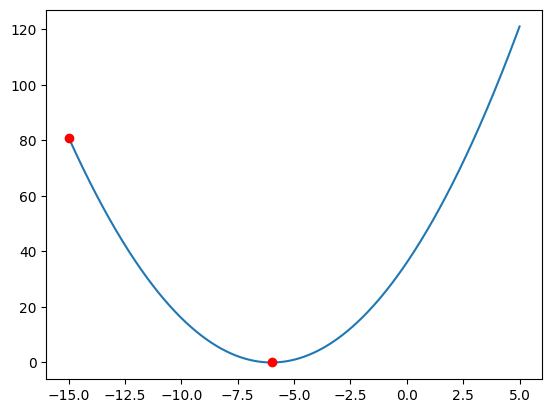

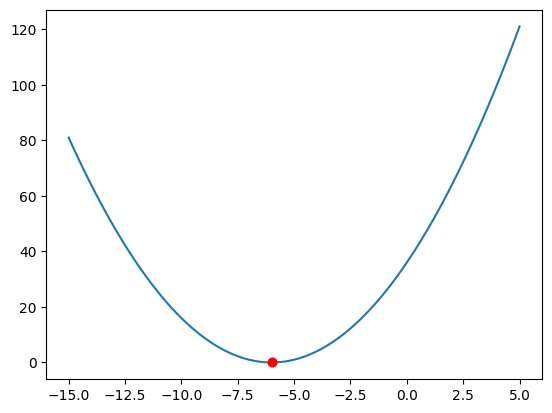

In [8]:
sub = plt.subplot(111)
sub.plot(x, x_squared1(x))
sub.plot(bracket[0], x_squared1(bracket[0]), "or")
sub.plot(bracket[1], x_squared1(bracket[1]), "or")
plt.show()

sub1 = plt.subplot(111)
sub1.plot(x, x_squared1(x))
sub1.plot(bracket_mod[0], x_squared1(bracket_mod[0]), "or")
sub1.plot(bracket_mod[1], x_squared1(bracket_mod[1]), "or")
plt.show()

In [9]:
# Função que retorna o valor fibonacci da posição n
def fibonacci(n):
    fn = [0, 1,]
    for i in range(2, n+1):
        fn.append(fn[i-1] + fn[i-2])
    return fn

In [10]:
'''Será sempre a partir do inicio  usado uma razão dos valores fibonacci para criar
c1 e d1, sempre d1 > c1. Basicamente o loop irá encolher o intervalo inicial (xl, xr)
dependendo nos valores de f(d1) e f(c1), esse loop ocorrendo até n ou a parada com intervalo
xr - xl < 0.1 (essa precisou ser adicionada pois na medida que o intervalo ficava muito 1*10^-6
ocorriam problemas) '''

def fib_search(f, n, xl, xr):
    F = fibonacci(n) 

    intervalo = xr - xl
    c1 = xl + F[n-2]/F[n]*intervalo
    d1 = xl + F[n-1]/F[n]*intervalo
    n-=1
    while(n>2):
       
        if(f(c1) > f(d1)):
            xl = c1
            intervalo = xr - xl
            c1 = xl + F[n-2]/F[n]*intervalo
            d1 = xl + F[n-1]/F[n]*intervalo

        else:
            xr = d1
            intervalo = xr - xl
            c1 = xl + F[n-2]/F[n]*intervalo
            d1 = xl + F[n-1]/F[n]*intervalo

        if intervalo < 0.01:
            return [xl, xr]

        n-=1

    return [xl, xr]

fib = fib_search(x_squared1, 40, -15, 15)
print("Fibonacci: ", fib)

Fibonacci:  [-6.0021994123076485, -5.993798404843425]


In [11]:
'''Desenvolvendo ferramentas necessárias para o algoritmo Quadratic-Fit'''

'''Como input recebe os coeficientes de x^2(coef2) e de x(coef1) calculado
então o x com a mínima da função'''
def zero_derivada_square(coef1, coef2):
    return - coef1/(2*coef2)

'''Função para resolver um sistema quadrático. Será passado pontos 3 [x,f(x)]
na função f e então iremos encontrar uma outra função quadrática que intercepta
esse 3 pontos'''
def solving_quadratic_system(f, x1, x2, x3):

    y1 = f(x1)
    y2 = f(x2)
    y3 = f(x3)

    parametros = np.ones([3,1])
    var = np.array([[1, x1, x1**2], [1, x2, x2**2], [1, x3, x3**2]])
    resultados = np.array([y1,y2,y3])

    inv_var = np.linalg.inv(var)
    parametros = inv_var.dot(resultados)

    return parametros

'''Quadratic_Fit é um outro algoritmo passado no livro, ele fará uso das
2 últimas funções de forma iterativa.
Será iniciado com 3 pontos e encontraremos uma função quadrática que os intercepta
Encontraremos a mínima da função quadrática
Será atualizado os 3 pontos agora incluindo a mínima 
Iterando entre esse 3 passos até que haja convergência das mínimas encontradas'''
def Quadratic_Fit(f, x1, x2, x3):
    diff = np.inf
    point0 = np.inf
    i = 0
    while(abs(diff)>0.1):
        parametros = solving_quadratic_system(f, x1, x2, x3)
        point = zero_derivada_square(parametros[1], parametros[2])

        if(point>x2):
            if(f(point)>f(x2)):
                x3 = point
            else:
                x1, x2 = x2, point
        
        else:
            if(f(point)>f(x2)):
                x1 = point
            else:
                x3, x2 = x2, point
        diff = point - point0
        point0 = point
        i+=1
    return point

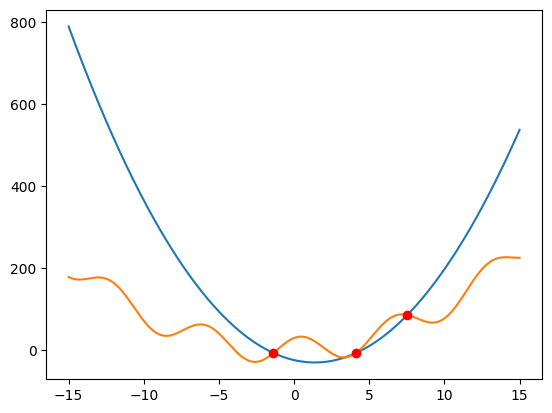

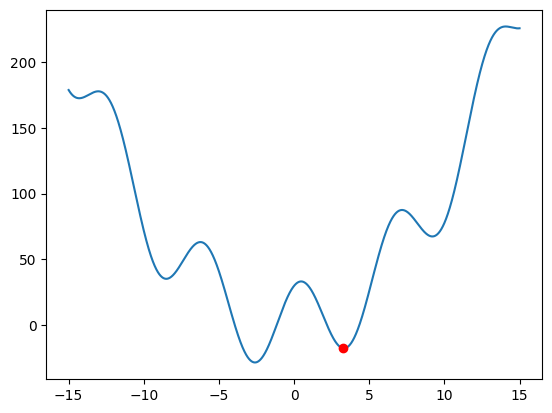

In [12]:
def plot(f, x, pontos, parametros_pontos, cor1, subplot):

    subplot.plot(x, parametros_pontos[0] + parametros_pontos[1]*x + parametros_pontos[2]*x**2)
    subplot.plot(x, f(x))
    subplot.plot(pontos[0], f(pontos[0]), cor1)
    subplot.plot(pontos[1], f(pontos[1]), cor1)
    subplot.plot(pontos[2], f(pontos[2]), cor1)
    
    plt.show()

x = np.linspace(-15, 15, 10000)
def func(x):
    return (x)**2 + 13*np.sin(x)+ 30*np.cos(x) +x

# 3 Pontos em x gerados aleatoriamente
pontos = np.random.rand(3) * np.random.randint(-15, 15, 3)
# Parâmetros da  função quadrática que intercepta os pontos
param = solving_quadratic_system(func, pontos[0],pontos[1],pontos[2])

ax = plt.subplot(111)
plot(func, x, pontos, param, "or", ax)

pnt = Quadratic_Fit(func, pontos[0],pontos[1],pontos[2])
sub = plt.subplot(111)
sub.plot(x, func(x))
sub.plot(pnt, func(pnt), "or")

In [13]:
'''Bisection funciona procurando 0 da derivada da função f.
No início ele irá buscar um intervalo [a,b] de forma que f(a)*f(b) <= 0
assim temos que há um x pertencendo à [a,b] tq f(x)=0.
Irá buscar então encurtar esse intervalo [a,b]'''
def Bisection(derivative_f, inicio, fim, rate=0.005, e = 0.001):
    x1 = inicio
    der_inicio = derivative_f(inicio)
    i = 0

    while True:
        i+=1
        x1 = x1 + abs(x1*rate) + rate
        if(x1 > fim):
            return [0, 0]
        if der_inicio * derivative_f(x1) < 0:
            break

    while abs(x1 - inicio) > e:
        passo = inicio + abs((x1 - inicio)/2)
        der_passo = derivative_f(passo)
        der_inicio = derivative_f(inicio)
        if(np.sign(der_inicio) == np.sign(der_passo)):
            inicio = passo
        else:
            x1 = passo
    return inicio + (inicio - x1)/2

C:\Users\marco\AppData\Local\Temp\ipykernel_14260\2905203698.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(bisect,func(bisect), "or", color="b")
C:\Users\marco\AppData\Local\Temp\ipykernel_14260\2905203698.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(bisect,dev_func(bisect), "or", color="b")


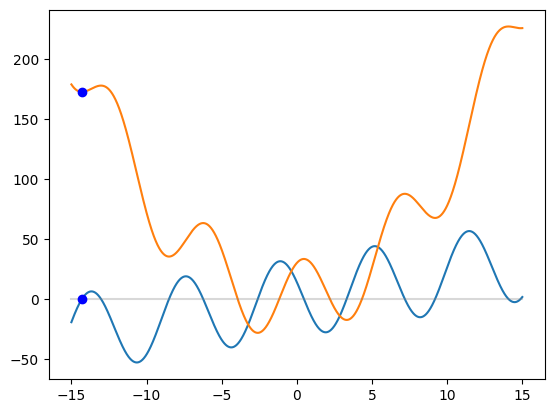

In [14]:
def func(x):
    return (x)**2 + 13*np.sin(x)+ 30*np.cos(x) +x

# Derivada da função usada em Quadratic-fit
def dev_func(x):
    return 2*(x) + 13*np.cos(x) - 30*np.sin(x) + 1

bisect = Bisection(dev_func, -15, 15)

ax = plt.subplot(111)
x = np.linspace(-15, 15, 10000)
ax.plot(x, dev_func(x))
ax.plot(x, func(x))
plt.plot([15,-15], [0,0], linestyle="-", color=('grey', 0.3))
plt.plot(bisect,func(bisect), "or", color="b")
plt.plot(bisect,dev_func(bisect), "or", color="b")

In [15]:
'''Uma modificação do Bisection para que ele não pare na primeira mínima, podemos especificar
em "n_iteration" quantos 0 da derivada ele irá encontrar (caso for mais que a existente ele 
passara por todas) podemos então selecionar o melhor 0 da derivada encontrado'''
def Bisection_mod(f, derivative_f, ini, termino, n_iteration):
    perfomace = {}
    for i in range(n_iteration):
        point = Bisection(derivative_f, ini, termino)
        if point == 0:
            continue
        perfomace[point] = f(point)
        ini = point + 0.001
        
    performace = sorted(perfomace.items(), key=lambda x:x[1])
    return performace

In [16]:
bisect = Bisection_mod(func, dev_func, -15, 15, 7)
bisect
"sendo bisect[0][0] o melhor ponto"

'sendo bisect[0][0] o melhor ponto'

C:\Users\marco\AppData\Local\Temp\ipykernel_14260\545308544.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(bisect[0][0],func(bisect[0][0]), "or", color="b")
C:\Users\marco\AppData\Local\Temp\ipykernel_14260\545308544.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(bisect[0][0],dev_func(bisect[0][0]), "or", color="b")


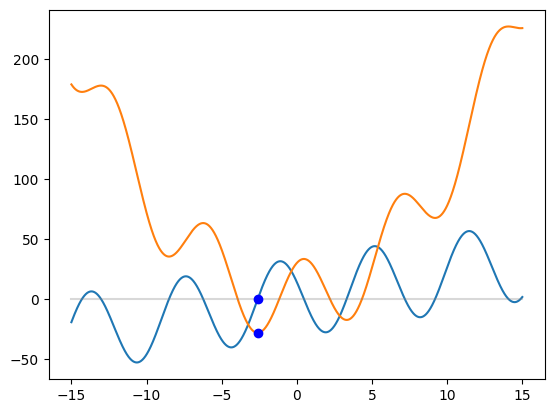

In [17]:
ax = plt.subplot(111)
x = np.linspace(-15, 15, 10000)
ax.plot(x, dev_func(x))
ax.plot(x, func(x))
plt.plot([15,-15], [0,0], linestyle="-", color=('grey', 0.3))
plt.plot(bisect[0][0],func(bisect[0][0]), "or", color="b")
plt.plot(bisect[0][0],dev_func(bisect[0][0]), "or", color="b")

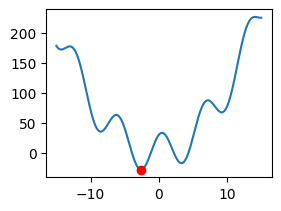

In [32]:
'''É uma condição que estimula passos maiores, porem quanto maior esse passo
melhor(reduzir mais a função) ele deve ser'''
def first_wolfecondition(f, dev_f, x, B=0.0001):
    while abs(dev_f(x)) > 0.1:
        direction = -dev_f(x)
        for step in np.linspace(5, B, 500):
            x_k = x + step*direction
            bound = f(x) + B*step*direction
            if(f(x_k)<bound):
                x = x_k
                break
        if step == B:
            return x

    return x

wolf_1 = first_wolfecondition(func, dev_func, -13)
ax = plt.subplot(221)
x = np.linspace(-15, 15, 10000)
ax.plot(x, func(x))
ax.plot(wolf_1, func(wolf_1), "or")

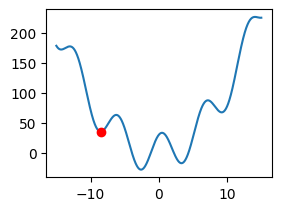

In [31]:
'''É uma condição que estimula passos que produzem uma diferença significante
no gradient do passo estimado para o anterior, dessa forma escolhendo passos maiores'''
def second_wolfecondition(dev_f, x, B=4, cond=0.9):
    while abs(dev_f(x)) > 0.1:
        direction = -dev_f(x)
        for step in np.linspace(0.001, B, 500):
            x_k = x + step*direction
            if(dev_f(x_k)*(direction) >= cond*direction*dev_f(x)):
                x = x_k
                break
        if step == B:
            return x
    return x

wolf_2 = second_wolfecondition(dev_func, -12)
ax = plt.subplot(221)
x = np.linspace(-15, 15, 10000)
ax.plot(x, func(x))
ax.plot(wolf_2, func(wolf_2), "or")